In [1]:
versioninfo()

Julia Version 1.10.4
Commit 48d4fd4843 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 24 × 12th Gen Intel(R) Core(TM) i9-12900K
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, alderlake)
Threads: 1 default, 0 interactive, 1 GC (on 24 virtual cores)


In [2]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
Pkg.status()

  Activating project at `C:\Users\o6m1g\Documents\GitHub\ASMC-BayesCV`
Precompiling project...
  ✓ Libmount_jll
  ✓ EpollShim_jll
  ✓ LLVMOpenMP_jll
  ✓ Xorg_libICE_jll
  ✓ Xorg_libXau_jll
  ✓ mtdev_jll
  ✓ Xorg_libXdmcp_jll
  ✓ eudev_jll
  ✓ libevdev_jll
  ✓ Dbus_jll
  ✓ Xorg_xtrans_jll
  ✓ Unitful → ForwardDiffExt
  ✓ Xorg_libX11_jll
  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libXfixes_jll
  ✓ Xorg_libxkbfile_jll
  ✓ Xorg_libXinerama_jll
  ✓ Xorg_libXrandr_jll
  ✓ Pango_jll
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_libXi_jll
  ✓ Xorg_xkbcomp_jll
  ✓ Xorg_xkeyboard_config_jll
  ✓ libdecor_jll
  ✓ Qt6ShaderTools_jll
  ✓ Qt6Declarative_jll
  ✓ Qt6Wayland_jll
  27 dependencies successfully precompiled in 65 seconds. 407 already precompiled.


Status `C:\Users\o6m1g\Documents\GitHub\ASMC-BayesCV\Project.toml`
  [0bf59076] AdvancedHMC v0.8.0
  [336ed68f] CSV v0.10.15
  [a93c6f00] DataFrames v1.7.0
  [31c24e10] Distributions v0.25.120
  [4138dd39] JLD v0.13.5
  [b964fa9f] LaTeXStrings v1.4.0
  [6fdf6af0] LogDensityProblems v2.1.2
  [86f7a689] NamedArrays v0.10.4
  [ce719bf2] PSIS v0.9.8
  [91a5bcdd] Plots v1.40.17
  [92933f4c] ProgressMeter v1.10.4
  [f2b01f46] Roots v2.2.8
  [2913bbd2] StatsBase v0.34.5
  [4c63d2b9] StatsFuns v1.5.0
  [f3b207a7] StatsPlots v0.15.7
⌅ [fce5fe82] Turing v0.39.6
  [ade2ca70] Dates
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


In [3]:
include("Init.jl")

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [22]:
# Tag by timestamp
SESSION = Dates.format(now(), "yyyy-mm-dd-HH-MM-SS");

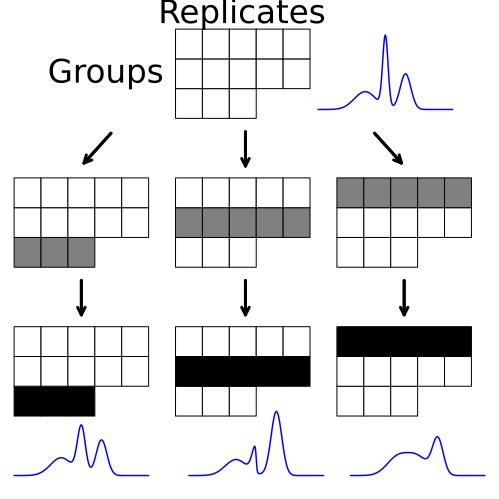

In [26]:
let
    plot(axis=false, grid=false, legend=false)
    
    function rectangle(a::Tuple, b::Tuple, c::Tuple, d::Tuple)
        (a_x, a_y) = a # lower-left
        (b_x, b_y) = b # lower-right
        (c_x, c_y) = c # upper-right
        (d_x, d_y) = d # upper-left
        Shape([a_x, b_x, c_x, d_x], [a_y, b_y, c_y, d_y])
    end

    # Leave-group-out
    annotate!(.5, 2.6, text("Groups", :right, 22))
    annotate!(3.5, 4.6, text("Replicates", 22))
    for (g, N_g) in enumerate([3,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i, 0+g), (1+i, 0+g), (1+i, 1+g), (0+i, 1+g)), color=:white)
        end
    end

    x_shift, y_shift = -6, -5
    for (g, N_g) in enumerate([3,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=g == 1 ? :gray : :white)
        end
    end

    x_shift, y_shift = -6, -10
    for (g, N_g) in enumerate([3,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=g == 1 ? :black : :white)
        end
    end

    x_shift, y_shift = 0, -5
    for (g, N_g) in enumerate([3,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=g == 2 ? :gray : :white)
        end
    end

    x_shift, y_shift = 0, -10
    for (g, N_g) in enumerate([3,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=g == 2 ? :black : :white)
        end
    end
    
    x_shift, y_shift = 6, -5
    for (g, N_g) in enumerate([3,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=g == 3 ? :gray : :white)
        end
    end

    x_shift, y_shift = 6, -10
    for (g, N_g) in enumerate([3,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=g == 3 ? :black : :white)
        end
    end

    plot!(-1.4 .+ [0, -1], 0.5 .+ [0, -1], arrow=true, linewidth=3, color=:black)
    plot!(8.4 .+ [0, +1], 0.5 .+ [0, -1], arrow=true, linewidth=3, color=:black)
    plot!(7.2/2 .+ [0, 0], 0.5 .+ [0.05, -1.1], arrow=true, linewidth=3, color=:black)

    plot!(9.5 .+ [0, 0], -4.5 .+ [0.05, -1.1], arrow=true, linewidth=3, color=:black)
    plot!(-2.5 .+ [0, 0], -4.5 .+ [0.05, -1.1], arrow=true, linewidth=3, color=:black)
    plot!(7.2/2 .+ [0, 0], -4.5 .+ [0.05, -1.1], arrow=true, linewidth=3, color=:black)

    c = 8.8; plot!(c-2.5:0.01:c+2.5, x -> (p_x = pdf(MixtureModel([Normal(-0.75, .4), Normal(0, .1), Normal(0.75, .2)]) + c, x); 1.3 + 1.8 * p_x;), color=:blue, linewidth=1.5)

    c = 10; plot!(c-2.5:0.01:c+2.5, x -> (p_x = pdf(MixtureModel([Normal(-0.75, .4), 4*Normal(0, .1), Normal(0.75, .2)]) + c, x); -11 + 1.8 * p_x;), color=:blue, linewidth=1.5)
    c = 4; plot!(c-2.5:0.01:c+2.5, x -> (p_x = pdf(MixtureModel([Normal(-0.75, .4), SkewNormal(0, .15, -5), Normal(0.75, .2)], [0.3,0.1,0.6]) + c, x); -11 + 1.8 * p_x;), color=:blue, linewidth=1.5)
    c = -2.5; plot!(c-2.5:0.01:c+2.5, x -> (p_x = pdf(MixtureModel([Normal(-0.75, .4), 1.5*Normal(0, .1), Normal(0.75, .2)]) + c, x); -11 + 1.8 * p_x;), color=:blue, linewidth=1.5)
    
    plot!(size=(500,500),
        leftmargin=-10Plots.mm,
        rightmargin=-3Plots.mm,
        topmargin=2Plots.mm,
        bottommargin=-5Plots.mm
    ) |> display

    _dir = "img_$(SESSION)"
    isdir(_dir) || mkpath(_dir) # Ensure path is present
    savefig(joinpath(_dir, "LGO.pdf"))
end;

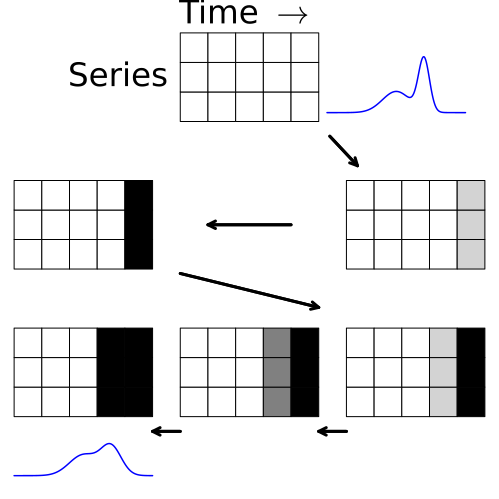

In [27]:
let
    plot(axis=false, grid=false, legend=false)
    
    function rectangle(a::Tuple, b::Tuple, c::Tuple, d::Tuple)
        (a_x, a_y) = a # lower-left
        (b_x, b_y) = b # lower-right
        (c_x, c_y) = c # upper-right
        (d_x, d_y) = d # upper-left
        Shape([a_x, b_x, c_x, d_x], [a_y, b_y, c_y, d_y])
    end

    # Leave-end-out
    annotate!(.5, 2.6, text("Series", :right, 22))
    annotate!(3.5, 4.6, text("Time " * L"\rightarrow", 22))
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i, 0+g), (1+i, 0+g), (1+i, 1+g), (0+i, 1+g)), color=:white)
        end
    end
    
    x_shift, y_shift = 6, -5
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=(i == N_g) ? :lightgray : :white)
        end
    end

    x_shift, y_shift = -6, -5
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=(i == N_g) ? :black : :white)
        end
    end

    x_shift, y_shift = 6, -10
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=(i == N_g) ? :black : (i == N_g-1 ? :lightgray : :white))
        end
    end

    x_shift, y_shift = 0, -10
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=(i == N_g) ? :black : (i == N_g-1 ? :gray : :white))
        end
    end

    x_shift, y_shift = -6, -10
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=(i == N_g) ? :black : (i == N_g-1 ? :black : :white))
        end
    end
    
    plot!(6.4 .+ [0, +1], 0.5 .+ [0, -1], arrow=true, linewidth=3, color=:black)
    plot!(5.0 .+ [0, -3], -2.5 .+ [0, 0], arrow=true, linewidth=3, color=:black)

    plot!(1.0 .+ [0, +5], -4.2 .+ [0.05, -1.1], arrow=true, linewidth=3, color=:black)
    
    plot!(7 .+ [0, -1], -9.5 .+ [0, 0], arrow=true, linewidth=3, color=:black)
    plot!(1 .+ [0, -1], -9.5 .+ [0, 0], arrow=true, linewidth=3, color=:black)

    c = 8.8; plot!(c-2.5:0.01:c+2.5, x -> (p_x = pdf(MixtureModel([Normal(0, .5), Normal(1, .2)]) + c, x); 1.3 + 1.8 * p_x;), color=:blue, linewidth=1.5)
    c = -2.5; plot!(c-2.5:0.01:c+2.5, x -> (p_x = pdf(MixtureModel([Normal(0, .51), Normal(1, .37)]) + c, x); -11 + 1.8 * p_x;), color=:blue, linewidth=1.5)
    
    plot!(size=(500,500),
        leftmargin=-10Plots.mm,
        rightmargin=-3Plots.mm,
        topmargin=3Plots.mm,
        bottommargin=-5Plots.mm
    ) |> display

    _dir = "img_$(SESSION)"
    isdir(_dir) || mkpath(_dir) # Ensure path is present
    savefig(joinpath(_dir, "LEO.pdf"))
end

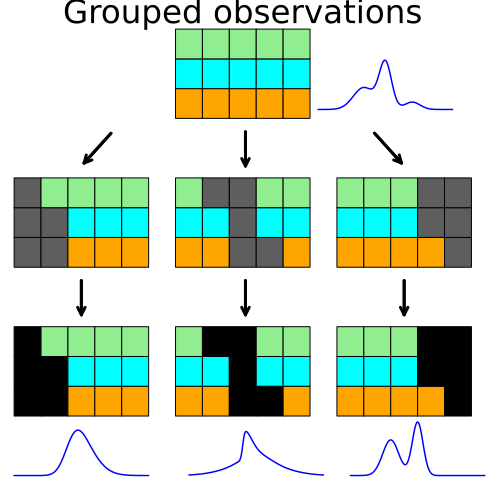

In [28]:
let
    plot(axis=false, grid=false, legend=false)
    
    function rectangle(a::Tuple, b::Tuple, c::Tuple, d::Tuple)
        (a_x, a_y) = a # lower-left
        (b_x, b_y) = b # lower-right
        (c_x, c_y) = c # upper-right
        (d_x, d_y) = d # upper-left
        Shape([a_x, b_x, c_x, d_x], [a_y, b_y, c_y, d_y])
    end

    Random.seed!(1)
    shuffle_idx = (1:15)# |> shuffle
    colors_vec = repeat([:orange, :cyan, :lightgreen]; outer=5)[shuffle_idx]
    colors_mat = reshape(colors_vec, 3, 5)
    fold_idxs = [1:5, 6:10, 11:15]#[[1,2,6,7,11], [3,4,8,12,13], [5,9,10,14,15]]
    
    # Leave-subset-out
    annotate!(3.5, 4.6, text("Grouped observations", 22))
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i, 0+g), (1+i, 0+g), (1+i, 1+g), (0+i, 1+g)), color=colors_mat[g,i])
            _str = nothing
            if colors_mat[g,i] == :orange
                _str = "C"
            elseif colors_mat[g,i] == :cyan
                _str = "B"
            elseif colors_mat[g,i] == :lightgreen
                _str = "A"
            else
            end
            #annotate!(i + 0.5, g + 0.5, text(_str, :black))
        end
    end

    x_shift, y_shift, fold_i, color = -6, -5, 1, RGB(0.37, 0.37, 0.37)
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=(x -> x ∈ fold_idxs[fold_i]).(reshape(shuffle_idx, 3, 5))[g,i] ? color : colors_mat[g,i])
        end
    end

    x_shift, y_shift, fold_i, color = -6, -10, 1, :black
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=(x -> x ∈ fold_idxs[fold_i]).(reshape(shuffle_idx, 3, 5))[g,i] ? color : colors_mat[g,i])
        end
    end

    x_shift, y_shift, fold_i, color = 0, -5, 2, RGB(0.37, 0.37, 0.37)
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=(x -> x ∈ fold_idxs[fold_i]).(reshape(shuffle_idx, 3, 5))[g,i] ? color : colors_mat[g,i])
        end
    end

    x_shift, y_shift, fold_i, color = 0, -10, 2, :black
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=(x -> x ∈ fold_idxs[fold_i]).(reshape(shuffle_idx, 3, 5))[g,i] ? color : colors_mat[g,i])
        end
    end
    
    x_shift, y_shift, fold_i, color = 6, -5, 3, RGB(0.37, 0.37, 0.37)
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=(x -> x ∈ fold_idxs[fold_i]).(reshape(shuffle_idx, 3, 5))[g,i] ? color : colors_mat[g,i])
        end
    end

    x_shift, y_shift, fold_i, color = 6, -10, 3, :black
    for (g, N_g) in enumerate([5,5,5])
        for i in 1:N_g
            plot!(rectangle((0+i + x_shift, 0+g + y_shift), (1+i + x_shift, 0+g + y_shift), (1+i + x_shift, 1+g + y_shift), (0+i + x_shift, 1+g + y_shift)), color=(x -> x ∈ fold_idxs[fold_i]).(reshape(shuffle_idx, 3, 5))[g,i] ? color : colors_mat[g,i])
        end
    end

    plot!(-1.4 .+ [0, -1], 0.5 .+ [0, -1], arrow=true, linewidth=3, color=:black)
    plot!(8.4 .+ [0, +1], 0.5 .+ [0, -1], arrow=true, linewidth=3, color=:black)
    plot!(7.2/2 .+ [0, 0], 0.5 .+ [0.05, -1.1], arrow=true, linewidth=3, color=:black)

    plot!(9.5 .+ [0, 0], -4.5 .+ [0.05, -1.1], arrow=true, linewidth=3, color=:black)
    plot!(-2.5 .+ [0, 0], -4.5 .+ [0.05, -1.1], arrow=true, linewidth=3, color=:black)
    plot!(7.2/2 .+ [0, 0], -4.5 .+ [0.05, -1.1], arrow=true, linewidth=3, color=:black)

    c = 8.8; plot!(c-2.5:0.01:c+2.5, x -> (p_x = pdf(MixtureModel([Normal(-0.8, .39), Normal(0, .23), Normal(1, .29)], [0.4, 0.5, 0.1]) + c, x); 1.3 + 1.8 * p_x;), color=:blue, linewidth=1.5)

    c = 10; plot!(c-2.5:0.01:c+2.5, x -> (p_x = pdf(MixtureModel([Normal(-1, .3), Normal(0, .2)]) + c, x); -11 + 1.8 * p_x;), color=:blue, linewidth=1.5)
    c = 4; plot!(c-2.5:0.01:c+2.5, x -> (p_x = pdf(MixtureModel([Normal(0, 1), SkewNormal(-0.5, .3, 5), SkewNormal(0, .5, 0)], [0.6, 0.2, 0.2]) + c, x); -11 + 1.8 * p_x;), color=:blue, linewidth=1.5)
    c = -2.5; plot!(c-2.5:0.01:c+2.5, x -> (p_x = pdf(SkewNormal(-0.5, .7, 2) + c, x); -11 + 1.8 * p_x;), color=:blue, linewidth=1.5)
    
    plot!(size=(500,500),
        leftmargin=-10Plots.mm,
        rightmargin=-3Plots.mm,
        topmargin=2Plots.mm,
        bottommargin=-5Plots.mm
    ) |> display

    _dir = "img_$(SESSION)"
    isdir(_dir) || mkpath(_dir) # Ensure path is present
    savefig(joinpath(_dir, "LSO.pdf"))
end;